# Different Expression Gene Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats

In [12]:
data = pd.read_csv("GSE32603_expr.txt",
                     header = 0,
                     index_col = 0,sep='\t')
data.head()


,Unnamed: 0,GSM808102,GSM808103,GSM808104,GSM808105,GSM808106,GSM808107,GSM808108,GSM808109,GSM808110,...,GSM808341,GSM808342,GSM808343,GSM808344,GSM808345,GSM808346,GSM808347,GSM808348,GSM808349,GSM808350
AA001150,NaN,-0.009951,0.046784,0.094696,-0.018907,0.330280,-0.068296,-0.495075,1.131031,-0.059406,...,-0.257225,-1.366120,-0.126899,-0.399129,0.213443,-1.176930,-0.625757,0.376370,-0.520224,0.169358
AA001199,NaN,0.219813,-0.478094,3.204340,0.795410,-0.163236,NaN,-0.641195,0.311717,NaN,...,3.721500,NaN,NaN,NaN,NaN,NaN,-0.193604,-1.041891,-1.045537,NaN
AA001219,SOCS3,-0.054194,-0.222324,0.313162,-0.668716,0.168581,3.046088,-0.088639,0.877231,0.655063,...,-0.847460,-0.816290,-0.599518,-0.700444,NaN,0.420850,-1.279959,NaN,0.546512,0.658143
AA001222,NaN,-0.064694,0.071550,0.493962,-0.195680,-0.897273,0.590420,1.522588,-0.716932,-0.112933,...,0.776744,0.098975,0.622732,0.492567,0.645370,1.043327,0.812737,-0.094251,-1.208710,-0.146379
AA001359,ZCCHC7,0.477207,0.215850,0.207428,-0.339807,0.914005,NaN,-0.702323,-2.264152,-0.356403,...,-0.889368,0.139151,0.707120,0.039643,-0.122945,0.150445,0.061360,-0.263531,0.268087,0.122461


In [13]:
# Check the dimension of the loaded data (rows & columns)
data.shape
# Number of rows
number_of_genes = len(data.index)
print(number_of_genes)
# check if there is NA in data
#data[data.isnull().values==True]
type(data)

35069


pandas.core.frame.DataFrame

In [14]:
#We replace NA to a very small number 0.001.
data2=data.replace(np.nan, 0.001)
del data2['Unnamed: 0']
data2.shape # This data sheet include about 35069 gene expression of 248 patients.

(35069, 248)

In [15]:
data2.head()

,GSM808102,GSM808103,GSM808104,GSM808105,GSM808106,GSM808107,GSM808108,GSM808109,GSM808110,GSM808111,...,GSM808341,GSM808342,GSM808343,GSM808344,GSM808345,GSM808346,GSM808347,GSM808348,GSM808349,GSM808350
AA001150,-0.009951,0.046784,0.094696,-0.018907,0.330280,-0.068296,-0.495075,1.131031,-0.059406,0.159016,...,-0.257225,-1.366120,-0.126899,-0.399129,0.213443,-1.176930,-0.625757,0.376370,-0.520224,0.169358
AA001199,0.219813,-0.478094,3.204340,0.795410,-0.163236,0.001000,-0.641195,0.311717,0.001000,0.687255,...,3.721500,0.001000,0.001000,0.001000,0.001000,0.001000,-0.193604,-1.041891,-1.045537,0.001000
AA001219,-0.054194,-0.222324,0.313162,-0.668716,0.168581,3.046088,-0.088639,0.877231,0.655063,0.271689,...,-0.847460,-0.816290,-0.599518,-0.700444,0.001000,0.420850,-1.279959,0.001000,0.546512,0.658143
AA001222,-0.064694,0.071550,0.493962,-0.195680,-0.897273,0.590420,1.522588,-0.716932,-0.112933,-0.260525,...,0.776744,0.098975,0.622732,0.492567,0.645370,1.043327,0.812737,-0.094251,-1.208710,-0.146379
AA001359,0.477207,0.215850,0.207428,-0.339807,0.914005,0.001000,-0.702323,-2.264152,-0.356403,0.159164,...,-0.889368,0.139151,0.707120,0.039643,-0.122945,0.150445,0.061360,-0.263531,0.268087,0.122461


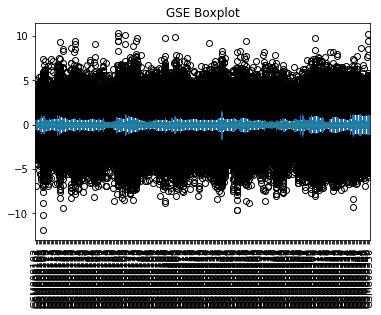

In [16]:
# Boxplot of each microarray
plt.show(data2.plot(kind = 'box', title = 'GSE Boxplot', rot = 90))
# Density
#plt.show(data2.plot(kind = 'density', title = 'GSE Density'))

In [17]:
# load patient data to define the group('recurrency group' and 'non-recurrency group')
pdata = pd.read_csv("pdata_GSE32603.txt",
                     header = 0,
                     index_col = 0,sep='\t')
pdata.head()

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,hr-positive_yes is 1:ch1,patient:ch1,pcr_yes is 1:ch1,rcb class:ch1,rcb index:ch1,recurrence_yes is 1:ch1,reference:ch2,rfs_days:ch1,tissue:ch1,treatment:ch1
GSM808102,BreastPrimaryTumor_treatmentF2_timePtT1_patien...,GSM808102,Public on Jun 12 2015,Oct 04 2011,Apr 27 2017,RNA,2,pretreatment Breast Tumor biopsy (T1),Homo sapiens,patient: 1001,...,1.0,1001,0.0,2.0,1.884,1,Stratagene Reference Pooled RNA,751,Breast,F2
GSM808103,BreastPrimaryTumor_treatmentF1_timePtT1_patien...,GSM808103,Public on Jun 12 2015,Oct 04 2011,Apr 27 2017,RNA,2,pretreatment Breast Tumor biopsy (T1),Homo sapiens,patient: 1012,...,1.0,1012,0.0,2.0,1.899,1,Stratagene Reference Pooled RNA,2425,Breast,F1
GSM808104,BreastPrimaryTumor_treatmentF1_timePtT1_patien...,GSM808104,Public on Jun 12 2015,Oct 04 2011,Apr 27 2017,RNA,2,pretreatment Breast Tumor biopsy (T1),Homo sapiens,patient: 1013,...,1.0,1013,0.0,3.0,3.673,0,Stratagene Reference Pooled RNA,2383,Breast,F1
GSM808105,BreastPrimaryTumor_treatmentF1_timePtT1_patien...,GSM808105,Public on Jun 12 2015,Oct 04 2011,Apr 27 2017,RNA,2,pretreatment Breast Tumor biopsy (T1),Homo sapiens,patient: 1002,...,1.0,1002,0.0,3.0,3.764,1,Stratagene Reference Pooled RNA,1043,Breast,F1
GSM808106,BreastPrimaryTumor_treatmentF1_timePtT1_patien...,GSM808106,Public on Jun 12 2015,Oct 04 2011,Apr 27 2017,RNA,2,pretreatment Breast Tumor biopsy (T1),Homo sapiens,patient: 1005,...,1.0,1005,0.0,NaN,NaN,0,Stratagene Reference Pooled RNA,2520,Breast,F1


In [18]:
grouped=pdata.groupby('recurrence_yes is 1:ch1') #set the group by patient data information
grouped.groups

{0: Index(['GSM808104', 'GSM808106', 'GSM808107', 'GSM808109', 'GSM808113',
        'GSM808114', 'GSM808115', 'GSM808117', 'GSM808122', 'GSM808123',
        ...
        'GSM808334', 'GSM808335', 'GSM808336', 'GSM808337', 'GSM808339',
        'GSM808344', 'GSM808346', 'GSM808347', 'GSM808348', 'GSM808350'],
       dtype='object', length=169),
 1: Index(['GSM808102', 'GSM808103', 'GSM808105', 'GSM808108', 'GSM808110',
        'GSM808111', 'GSM808112', 'GSM808116', 'GSM808118', 'GSM808119',
        'GSM808120', 'GSM808121', 'GSM808125', 'GSM808126', 'GSM808127',
        'GSM808128', 'GSM808130', 'GSM808134', 'GSM808135', 'GSM808136',
        'GSM808139', 'GSM808143', 'GSM808149', 'GSM808153', 'GSM808157',
        'GSM808171', 'GSM808178', 'GSM808179', 'GSM808193', 'GSM808195',
        'GSM808203', 'GSM808211', 'GSM808213', 'GSM808215', 'GSM808223',
        'GSM808227', 'GSM808236', 'GSM808237', 'GSM808238', 'GSM808242',
        'GSM808244', 'GSM808247', 'GSM808248', 'GSM808249', 'GSM80825

In [19]:
r = data2[grouped.groups[1]] #recurrency group
nr=data2[grouped.groups[0]] #non-recurrency group

In [20]:

# The mean of expression of the recurrency samples for each gene (row)
mean_r = r.mean(axis = 1)
mean_r.head()
# The mean of expression of the non-recurrency samples for each gene (row)
mean_nr = nr.mean(axis = 1)
mean_nr.head()

AA001150    0.025902
AA001199   -0.049686
AA001219   -0.023466
AA001222    0.055806
AA001359    0.021088
dtype: float64

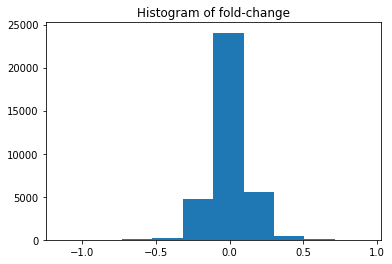

In [21]:
# Histogram of the fold-change
fold = mean_r - mean_nr
plt.hist(fold)
plt.title("Histogram of fold-change")
plt.show()


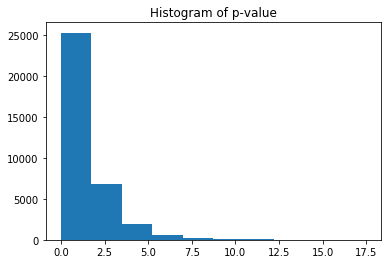

In [22]:
pvalue = []
for i in range(0, number_of_genes):
    ttest = stats.ttest_ind(r.iloc[i], nr.iloc[i])
    pvalue.append(ttest[1])

# Histogram of the p-values
plt.hist(-np.log(pvalue))
plt.title("Histogram of p-value")
plt.show()

In [23]:
# volcano graph to see the different expression gene
genearray = np.asarray(pvalue) 
result = pd.DataFrame({'pvalue':genearray,'FoldChange':fold}) 
result['log(pvalue)'] = -np.log(result['pvalue'])
result['sig'] = 'normal' 
result['size']  =np.abs(result['FoldChange'])/10 
result.loc[(result.FoldChange> 0.7 )&(result.pvalue < 0.05),'sig'] = 'up'
result.loc[(result.FoldChange< -0.7 )&(result.pvalue < 0.05),'sig'] = 'down'

Text(0.5, 0, 'FoldChange')

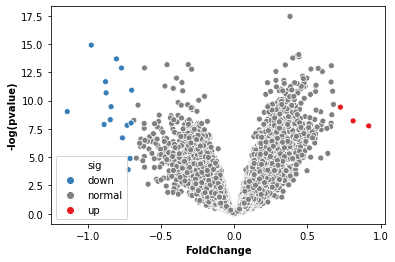

In [24]:
ax = sns.scatterplot(x="FoldChange", y="log(pvalue)",                      
                     hue='sig',                     
                     hue_order = ('down','normal','up'),                    
                     palette=("#377EB8","grey","#E41A1C"),                      
                     data=result)
ax.set_ylabel('-log(pvalue)',fontweight='bold')
ax.set_xlabel('FoldChange',fontweight='bold')


In [25]:
 filtered_ids = []
for i in range(0, number_of_genes):    
    if (abs(fold[i]) >= 0.7) and (pvalue[i] <= 0.05):        
        filtered_ids.append(i)        
        
filtered = data2.iloc[filtered_ids,:]
print("Number of different expression genes: ")
print(len(filtered.index))
filtered.head()

Number of different expression genes: 
19


,GSM808102,GSM808103,GSM808104,GSM808105,GSM808106,GSM808107,GSM808108,GSM808109,GSM808110,GSM808111,...,GSM808341,GSM808342,GSM808343,GSM808344,GSM808345,GSM808346,GSM808347,GSM808348,GSM808349,GSM808350
AA001376,1.831097,0.761252,0.723360,-0.499963,0.127459,2.056651,-1.372528,-1.157290,0.149690,-0.091266,...,2.617312,0.802725,0.768304,1.543570,-1.141043,-1.040782,-1.056206,0.071675,-1.615894,-0.741307
AA026641,-3.345364,-1.904413,1.450262,-3.073921,-1.327958,-0.521321,-1.491611,-1.322123,-1.794806,-1.070762,...,-0.954712,-1.468943,1.026239,-0.592164,0.920806,0.145231,-0.498903,-2.257705,3.013045,-0.965726
AA055768,2.089472,-0.669249,-0.397669,1.360559,1.604038,4.685927,-0.210437,-3.027556,2.150305,0.215100,...,2.969163,0.562106,1.293314,3.178647,-1.713404,-0.911482,0.811517,-0.232572,-0.640964,-0.421674
AA205072,0.561131,-0.050857,0.868508,-0.761044,1.647100,1.370424,-1.450521,-0.423354,1.173391,1.686215,...,-0.771538,1.168084,0.196841,5.102857,0.390901,0.001000,-0.836787,0.209104,-1.293310,-1.100436
AA291749,0.442375,0.523253,1.537873,1.688358,2.723747,1.925226,-2.224557,-5.012408,2.407912,0.109987,...,1.245791,2.854839,-0.157662,1.837073,-0.525766,-0.318783,1.399431,-0.276379,-1.555691,-0.893306


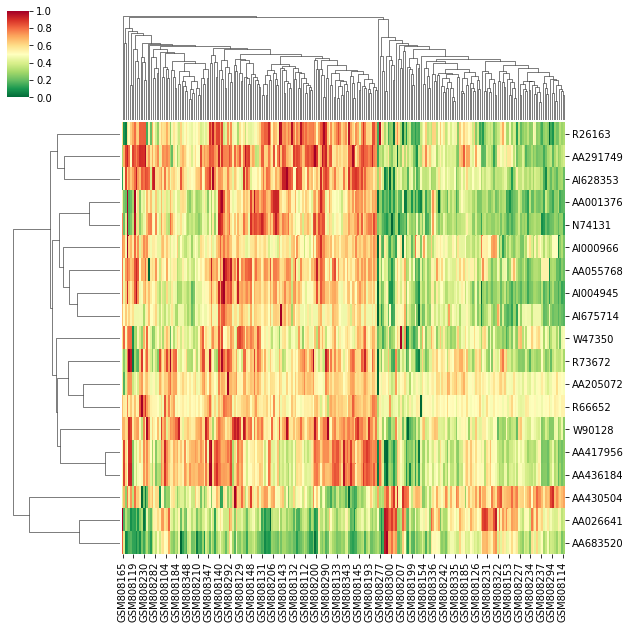

In [26]:
sns.clustermap(filtered, cmap='RdYlGn_r', standard_scale = 0)
#sns.heatmap(filtered2)

In [27]:
#set up the group list for PCA analysis
a=[]
for i in range(len(pdata)):
    if pdata['recurrence_yes is 1:ch1'][i]==1:
        a.append("recurrence")
    else:
        a.append("non-recurrence")
a1 = pd.DataFrame(a)
a1.head()

,0
0,recurrence
1,recurrence
2,non-recurrence
3,recurrence
4,non-recurrence


In [28]:
from sklearn.decomposition import PCA

In [29]:
data3=data2.T
data3.head()

,AA001150,AA001199,AA001219,AA001222,AA001359,AA001360,AA001375,AA001376,AA001398,AA001403,...,W96452,W96463,W96473,W96486,W96489,W99305,W99317,W99328,W99362,W99364
GSM808102,-0.009951,0.219813,-0.054194,-0.064694,0.477207,-0.011474,0.172244,1.831097,-0.470252,0.285218,...,-0.105590,0.046339,0.092851,-0.447332,-0.092783,-0.214086,-0.317953,0.313751,0.052291,0.695588
GSM808103,0.046784,-0.478094,-0.222324,0.071550,0.215850,0.085985,-0.006068,0.761252,-0.093591,-0.268706,...,-0.179646,-0.034985,0.229496,-1.486888,0.132895,0.067347,0.176883,-0.402953,-0.221808,-0.437283
GSM808104,0.094696,3.204340,0.313162,0.493962,0.207428,-0.205533,0.203027,0.723360,-0.795081,-0.009117,...,0.029549,0.028884,0.088301,-0.683473,-0.090591,0.126627,-0.396262,0.442369,0.143993,0.070171
GSM808105,-0.018907,0.795410,-0.668716,-0.195680,-0.339807,-0.123858,0.545753,-0.499963,-1.057985,0.540502,...,0.291717,-0.070582,-0.172442,0.831254,-0.244343,-0.074558,-0.526851,-0.748623,0.038716,0.776477
GSM808106,0.330280,-0.163236,0.168581,-0.897273,0.914005,0.007308,0.331018,0.127459,1.148154,0.254140,...,0.449566,0.689129,0.224192,-0.533270,0.677682,0.655730,0.420047,-0.432430,-0.452613,0.084642


In [30]:
pca = PCA(n_components=2)
X_data3= pca.fit(data3).transform(data3)
print(data3.shape)# original dimension
print(X_data3.shape)# main component dimension
print('Main Component Contributions:{}'.format(pca.explained_variance_ratio_))

(248, 35069)
(248, 2)
Main Component Contributions:[0.07940869 0.0479363 ]


In [31]:
pc_df = pd.DataFrame(data = X_data3 , 
        columns = ['PC1', 'PC2'])
pc_df['group'] = a1
pc_df.head()

,PC1,PC2,group
0,-18.258309,10.454549,recurrence
1,4.500510,-5.702630,recurrence
2,-8.140028,-10.818222,non-recurrence
3,-28.988713,21.364274,recurrence
4,56.396062,32.013385,non-recurrence


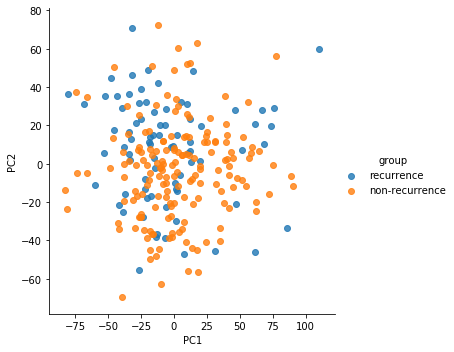

In [32]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='group') 
#plt.scatter(X_bnm,c='g',marker='.')
#scatter_kws={"s": 80}# specify the point size
#legend=True# color by cluster
#plt.show()

In [33]:
# PCA on filtered gene(different expression)
filtered3=filtered.T
filtered3
pca_f = PCA(n_components=2)
X_filtered3= pca_f.fit(filtered3).transform(filtered3)
print(filtered3.shape)# original dimension
print(X_filtered3.shape)# main component dimension
print('Main Component Contributions:{}'.format(pca.explained_variance_ratio_))


(248, 19)
(248, 2)
Main Component Contributions:[0.07940869 0.0479363 ]


In [34]:
pc_dff = pd.DataFrame(data = X_filtered3 , 
        columns = ['PC1', 'PC2'])
pc_dff['group'] = a1
pc_dff.head()


,PC1,PC2,group
0,-4.889414,-2.293003,recurrence
1,-0.800854,-2.609229,recurrence
2,-3.305615,2.139485,non-recurrence
3,-3.221132,-3.375545,recurrence
4,-6.708614,-0.858645,non-recurrence


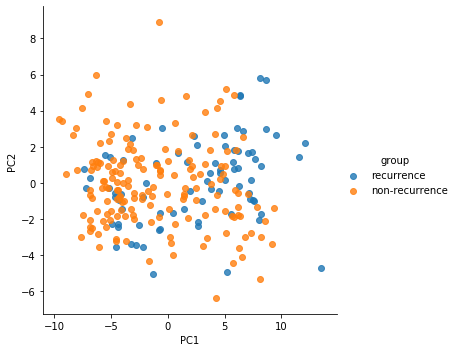

In [35]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_dff, 
  fit_reg=False, 
  hue='group') 